# testing out YTTiledArbitraryGrid

dev yt branch at https://github.com/chrishavlin/yt/tree/tiled_arbitrary_grid

WARNING: the nested grids can cache field data... initial implementaiton avoids this but doesnt account for field aliases. e.g., `('enzo','Density')` will **not** be cached but `

In [1]:
import yt 
from yt.data_objects.construction_data_containers import YTTiledArbitraryGrid
import matplotlib.pyplot as plt 
import numpy as np


ds = yt.load_sample("DeeplyNestedZoom")
# INTERESTING: NEED TO BUILD INDEX BEFORE DASK CALL OR YOU GET ERROR ON DASK COMPUTE
ds.index 
tag = YTTiledArbitraryGrid(ds.domain_left_edge,
                     ds.domain_right_edge,
                     (64,64,64), # global dimension
                     2, # nchunks = nprocs
                     ds=ds)


yt : [INFO     ] 2024-07-02 15:23:35,389 Sample dataset found in '/home/chavlin/hdd/data/yt_data/yt_sample_sets/DeeplyNestedZoom/DD0025/data0025'
yt : [INFO     ] 2024-07-02 15:23:35,591 Parameters: current_time              = 14.1336338797
yt : [INFO     ] 2024-07-02 15:23:35,592 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-07-02 15:23:35,592 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-07-02 15:23:35,593 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2024-07-02 15:23:35,593 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2024-07-02 15:23:35,594 Parameters: current_redshift          = 14.092558914923
yt : [INFO     ] 2024-07-02 15:23:35,594 Parameters: omega_lambda              = 0.6911
yt : [INFO     ] 2024-07-02 15:23:35,595 Parameters: omega_matter              = 0.3089
yt : [INFO     ] 2024-07-02 15:23:35,595 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2024-07-02 15:23:35,59

In [2]:
len(tag._grids)

2

In [3]:
vals = tag.to_numpy(('enzo','Density'))
vals.shape

(64, 64, 64)

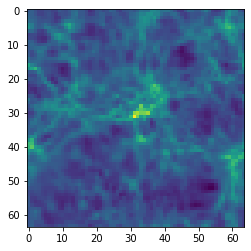

In [4]:
plt.imshow(np.log10(vals[:,:,32]))

In [5]:
from dask.distributed import Client
import yt 
from yt.data_objects.construction_data_containers import YTTiledArbitraryGrid
import matplotlib.pyplot as plt 
import numpy as np

note: processing in serial here, some flakiness in parallel?

In [6]:
c = Client(n_workers=1, processes=False, threads_per_worker=1)

Parsing Hierarchy : 100%|█████████████████████████████| 1825/1825 [00:00<00:00, 4916.02it/s]


In [7]:
c

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://192.168.68.117:8787/status,
Dashboard: http://192.168.68.117:8787/status,Workers: 1
Total threads: 1,Total memory: 31.18 GiB
Status: running,Using processes: False
Comm: inproc://192.168.68.117/613758/1,Workers: 1
Dashboard: http://192.168.68.117:8787/status,Total threads: 1
Started: Just now,Total memory: 31.18 GiB
Comm: inproc://192.168.68.117/613758/4,Total threads: 1
Dashboard: http://192.168.68.117:45827/status,Memory: 31.18 GiB
Nanny: None,


In [8]:
ds = yt.load_sample("DeeplyNestedZoom")
_ = ds.index
tag = YTTiledArbitraryGrid(ds.domain_left_edge,
                     ds.domain_right_edge,
                     (128,128,128), # global dimension
                     8, # nchunks = nprocs
                     ds=ds)

print("build delayed array")
da = tag.to_dask(('enzo','Density'))
da


yt : [INFO     ] 2024-07-02 15:23:38,300 Sample dataset found in '/home/chavlin/hdd/data/yt_data/yt_sample_sets/DeeplyNestedZoom/DD0025/data0025'
yt : [INFO     ] 2024-07-02 15:23:38,370 Parameters: current_time              = 14.1336338797
yt : [INFO     ] 2024-07-02 15:23:38,371 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-07-02 15:23:38,371 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-07-02 15:23:38,371 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2024-07-02 15:23:38,372 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2024-07-02 15:23:38,372 Parameters: current_redshift          = 14.092558914923
yt : [INFO     ] 2024-07-02 15:23:38,372 Parameters: omega_lambda              = 0.6911
yt : [INFO     ] 2024-07-02 15:23:38,373 Parameters: omega_matter              = 0.3089
yt : [INFO     ] 2024-07-02 15:23:38,374 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2024-07-02 15:23:38,37

build delayed array


dask.array<setitem, shape=(128, 128, 128), dtype=float64, chunksize=(64, 64, 64), chunktype=numpy.ndarray>

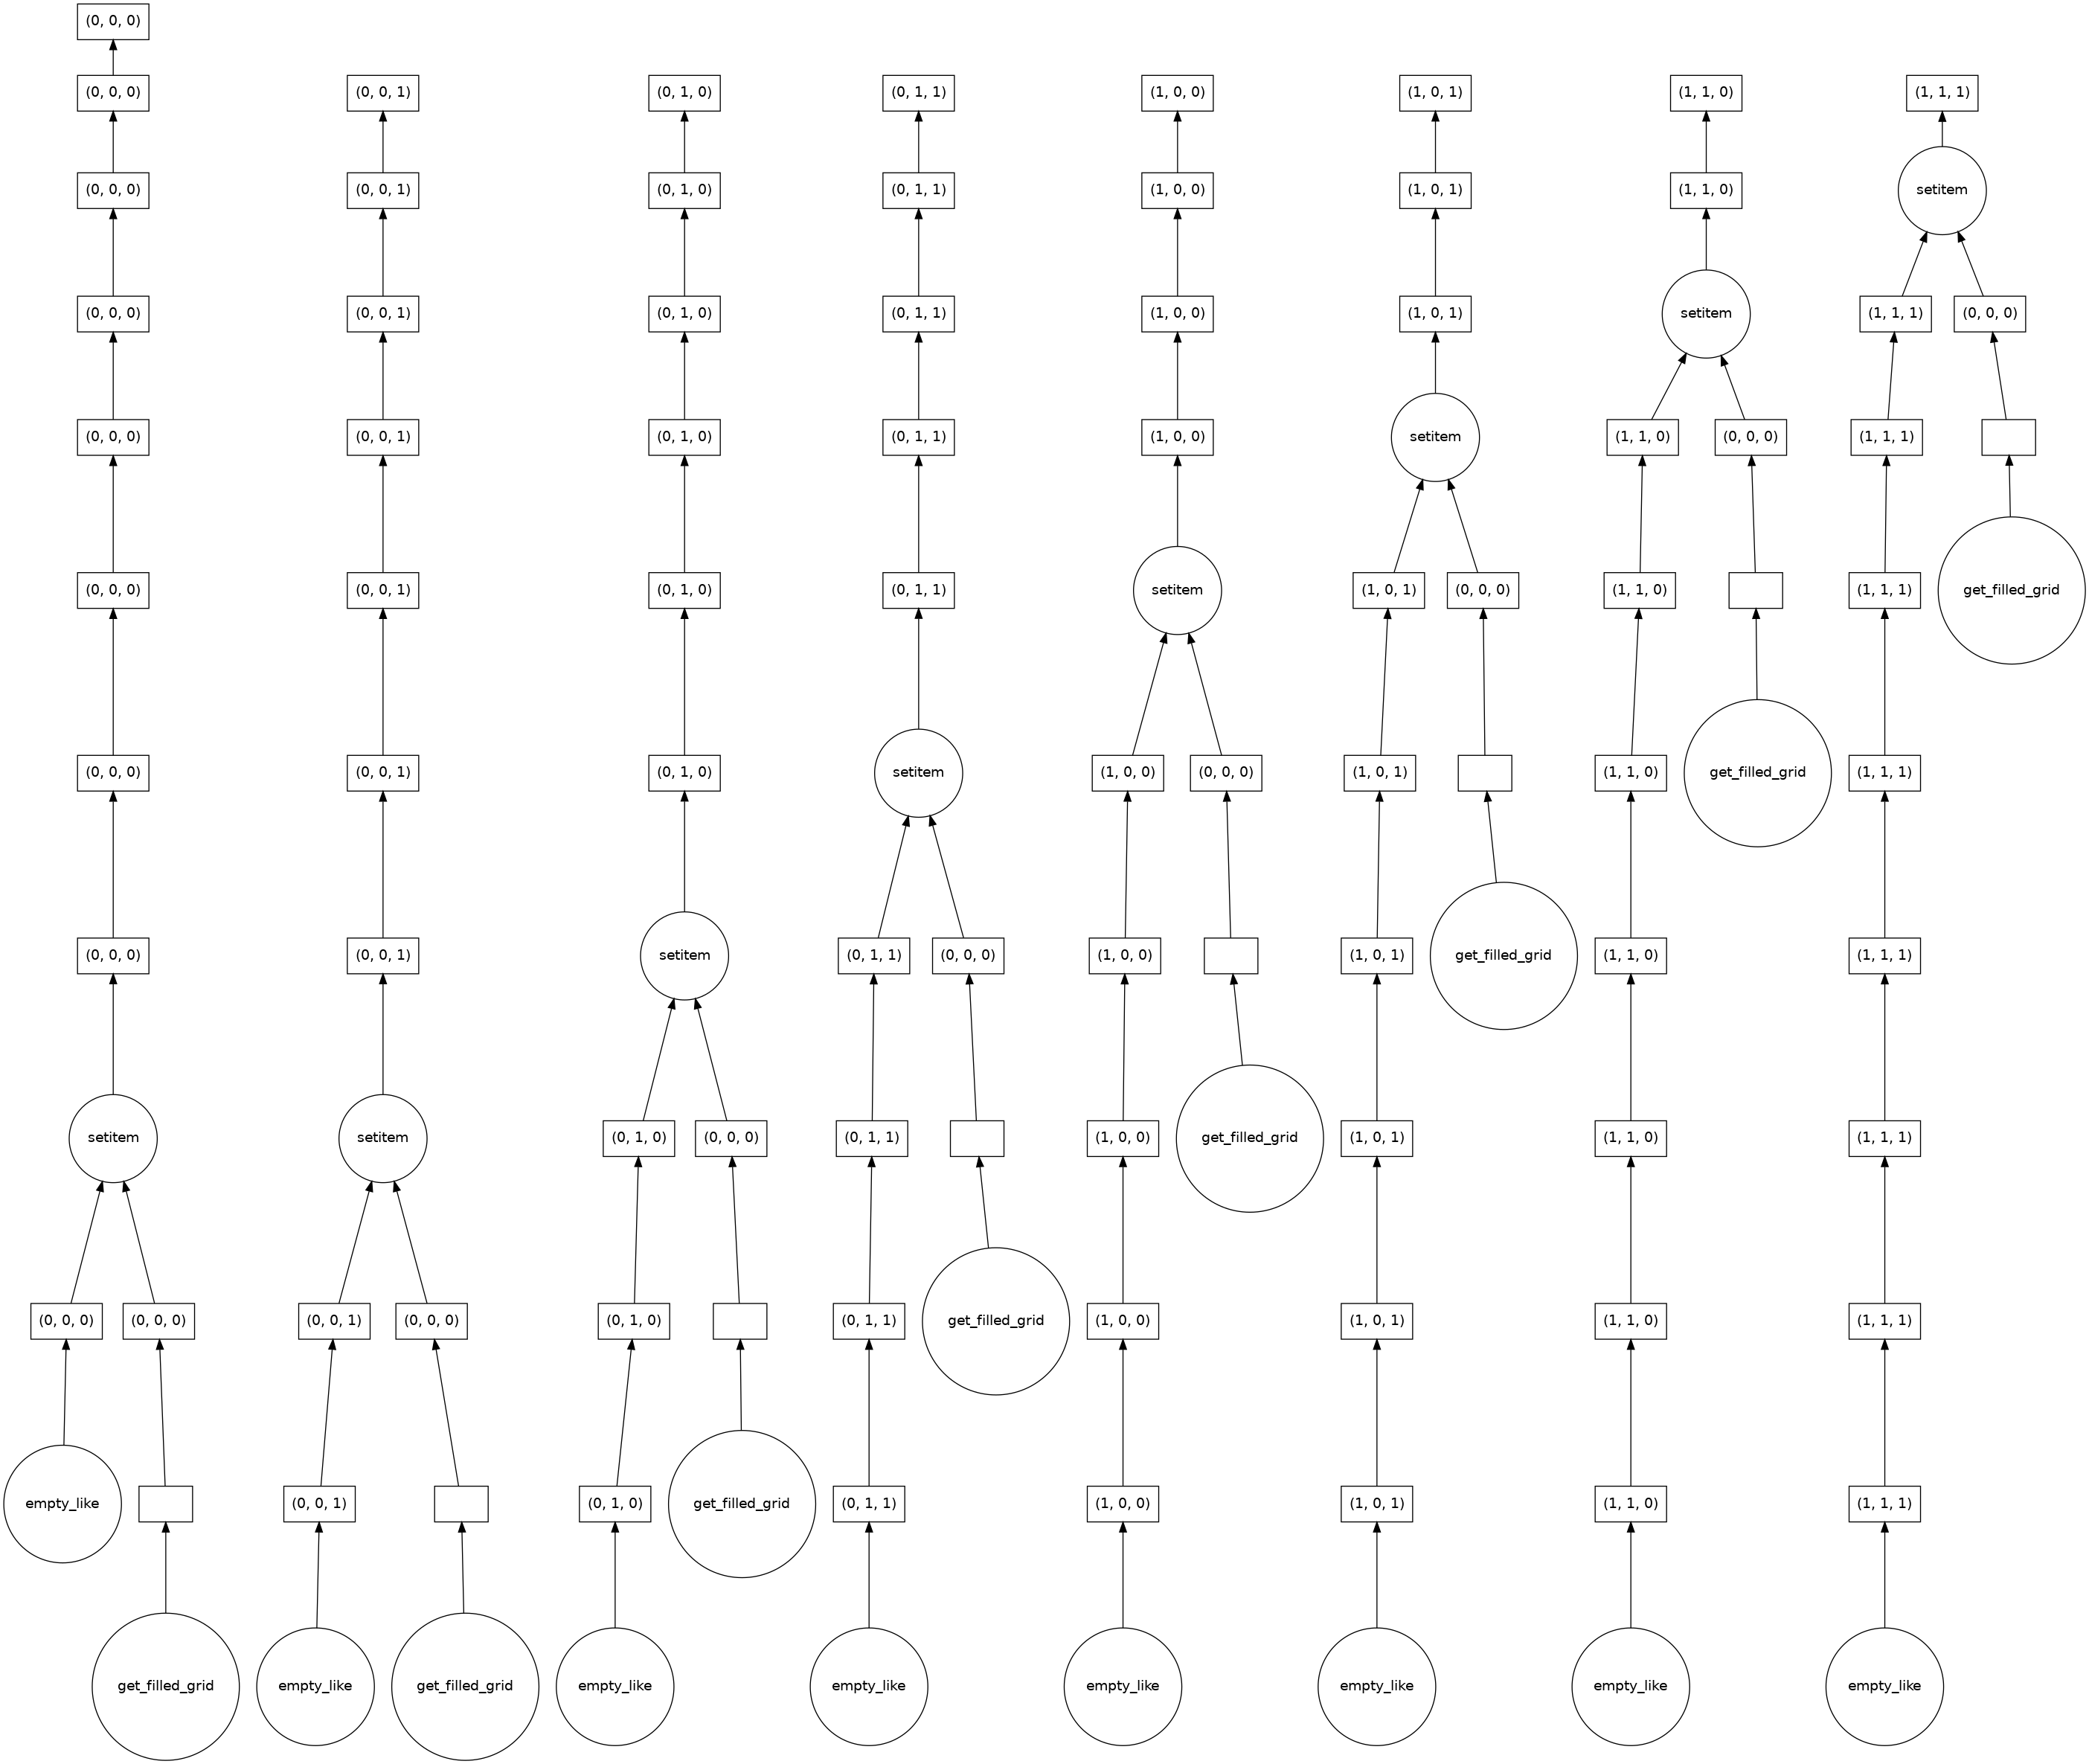

In [9]:
da.visualize()

In [10]:
ds = yt.load_sample("DeeplyNestedZoom")
_ = ds.index
tag = YTTiledArbitraryGrid(ds.domain_left_edge,
                     ds.domain_right_edge,
                     (1024,1024,1024), # global dimension
                     512, # nchunks = nprocs
                     ds=ds)

print("build delayed array")
da = tag.to_dask(('enzo','Density'))
da

yt : [INFO     ] 2024-07-02 15:23:39,662 Sample dataset found in '/home/chavlin/hdd/data/yt_data/yt_sample_sets/DeeplyNestedZoom/DD0025/data0025'
yt : [INFO     ] 2024-07-02 15:23:39,723 Parameters: current_time              = 14.1336338797
yt : [INFO     ] 2024-07-02 15:23:39,724 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-07-02 15:23:39,724 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-07-02 15:23:39,725 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2024-07-02 15:23:39,725 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2024-07-02 15:23:39,726 Parameters: current_redshift          = 14.092558914923
yt : [INFO     ] 2024-07-02 15:23:39,727 Parameters: omega_lambda              = 0.6911
yt : [INFO     ] 2024-07-02 15:23:39,727 Parameters: omega_matter              = 0.3089
yt : [INFO     ] 2024-07-02 15:23:39,727 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2024-07-02 15:23:39,72

build delayed array


dask.array<setitem, shape=(1024, 1024, 1024), dtype=float64, chunksize=(128, 128, 128), chunktype=numpy.ndarray>

In [11]:
da.chunks

((128, 128, 128, 128, 128, 128, 128, 128),
 (128, 128, 128, 128, 128, 128, 128, 128),
 (128, 128, 128, 128, 128, 128, 128, 128))

In [12]:
da[:,:,512]

dask.array<getitem, shape=(1024, 1024), dtype=float64, chunksize=(128, 128), chunktype=numpy.ndarray>

In [13]:
yt.set_log_level(50)

CPU times: user 4.16 s, sys: 231 ms, total: 4.39 s
Wall time: 4.34 s


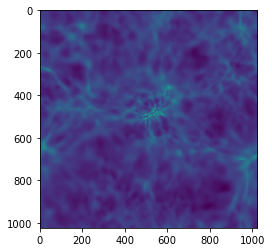

In [14]:
%%time
da = tag.to_dask(('enzo','Density'))
plt.imshow(np.log10(da[:,:,512].compute()))

In [15]:
ds = yt.load_sample("DeeplyNestedZoom")
tag = YTTiledArbitraryGrid(ds.domain_left_edge,
                     ds.domain_right_edge,
                     (2048,2048,2048), # global dimension
                     256, # nchunks = nprocs
                     ds=ds)

In [16]:
da = tag.to_dask(('enzo','Density'))
da

dask.array<setitem, shape=(2048, 2048, 2048), dtype=float64, chunksize=(512, 256, 256), chunktype=numpy.ndarray>

CPU times: user 7.86 s, sys: 4.58 s, total: 12.4 s
Wall time: 12 s


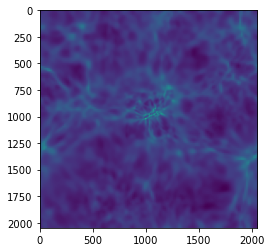

In [17]:
%%time
plt.imshow(np.log10(da[:,:,da.shape[-1]/2].compute()))

In [18]:
ds = yt.load_sample("DeeplyNestedZoom")
tag = YTTiledArbitraryGrid(ds.domain_left_edge,
                     ds.domain_right_edge,
                     (2048,2048,2048), # global dimension
                     512, # nchunks = nprocs
                     ds=ds)
da = tag.to_dask(('enzo','Density'))
da

dask.array<setitem, shape=(2048, 2048, 2048), dtype=float64, chunksize=(256, 256, 256), chunktype=numpy.ndarray>

CPU times: user 9.12 s, sys: 4.6 s, total: 13.7 s
Wall time: 13.3 s


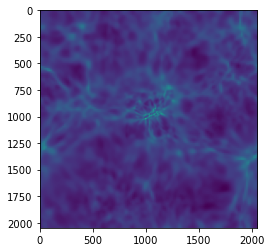

In [19]:
%%time
plt.imshow(np.log10(da[:,:,da.shape[-1]/2].compute()))

# Fill an in-memory np array

useful for testing, not much else. 

In [20]:
ds = yt.load_sample("DeeplyNestedZoom")
tag = YTTiledArbitraryGrid(ds.domain_left_edge,
                     ds.domain_right_edge,
                     (32,32,32), # global dimension
                     4, # nchunks = nprocs
                     ds=ds)

In [21]:
%%time
dens = tag.to_numpy(("enzo", "Density"))

Parsing Hierarchy : 100%|████████████████████████████| 1825/1825 [00:00<00:00, 23567.06it/s]


CPU times: user 2.04 s, sys: 75 ms, total: 2.12 s
Wall time: 2.09 s


In [22]:
dens.shape

(32, 32, 32)

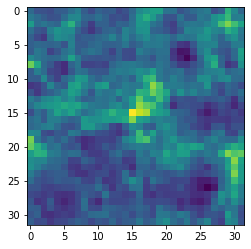

In [23]:
import matplotlib.pyplot as plt 
import numpy as np
plt.imshow(np.log10(dens[:,:,16]))

# and xarray dataaray (backed by dask)

In [24]:
ds = yt.load_sample("DeeplyNestedZoom")
tag = YTTiledArbitraryGrid(ds.domain_left_edge,
                     ds.domain_right_edge,
                     (2048,2048,2048), # global dimension
                     512, # nchunks = nprocs
                     ds=ds)

In [25]:
%%time
xr_da = tag.to_xarray(('enzo','Density'))

CPU times: user 836 ms, sys: 35 ms, total: 871 ms
Wall time: 862 ms


In [26]:
xr_ds = xr_da.to_dataset(promote_attrs=True)

In [27]:
xr_ds

<xarray.Dataset>
Dimensions:       (x: 2048, y: 2048, z: 2048)
Coordinates:
  * x             (x) float64 0.0002441 0.0007324 0.001221 ... 0.9993 0.9998
  * y             (y) float64 0.0002441 0.0007324 0.001221 ... 0.9993 0.9998
  * z             (z) float64 0.0002441 0.0007324 0.001221 ... 0.9993 0.9998
Data variables:
    enzo_Density  (x, y, z) float64 dask.array<chunksize=(256, 256, 256), meta=np.ndarray>
Attributes:
    ngrids:     512
    fieldname:  ('enzo', 'Density')

In [28]:
xr_ds.enzo_Density

<xarray.DataArray 'enzo_Density' (x: 2048, y: 2048, z: 2048)>
dask.array<setitem, shape=(2048, 2048, 2048), dtype=float64, chunksize=(256, 256, 256), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 0.0002441 0.0007324 0.001221 ... 0.9988 0.9993 0.9998
  * y        (y) float64 0.0002441 0.0007324 0.001221 ... 0.9988 0.9993 0.9998
  * z        (z) float64 0.0002441 0.0007324 0.001221 ... 0.9988 0.9993 0.9998
Attributes:
    ngrids:     512
    fieldname:  ('enzo', 'Density')

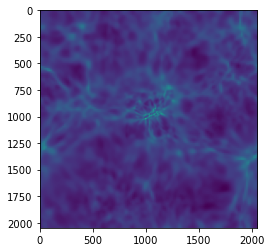

In [29]:
plt.imshow(np.log10(xr_ds.enzo_Density[:,:,1024].compute()))

## to zarr

In [30]:
import os 
import shutil

def prep_zarr_dir(res_lev):
    fdir =yt.config.ytcfg.get('yt', 'test_data_dir')
    fdir = os.path.join(fdir, f"DeeplyNestedZoom_zarr_{res_lev}")
    if os.path.isdir(fdir):    

        shutil.rmtree(fdir)     
    os.mkdir(fdir)
    return os.path.join(fdir, 'dnz.zarr')
    

In [31]:
ds = yt.load_sample("DeeplyNestedZoom")
tag = YTTiledArbitraryGrid(ds.domain_left_edge,
                     ds.domain_right_edge,
                     (64,64,64), # global dimension
                     8, # nchunks = nprocs
                     ds=ds)

xr_da = tag.to_xarray(('enzo','Density'))
xr_ds = xr_da.to_dataset(promote_attrs=True)
xr_ds.enzo_Density

<xarray.DataArray 'enzo_Density' (x: 64, y: 64, z: 64)>
dask.array<setitem, shape=(64, 64, 64), dtype=float64, chunksize=(32, 32, 32), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 0.007812 0.02344 0.03906 ... 0.9609 0.9766 0.9922
  * y        (y) float64 0.007812 0.02344 0.03906 ... 0.9609 0.9766 0.9922
  * z        (z) float64 0.007812 0.02344 0.03906 ... 0.9609 0.9766 0.9922
Attributes:
    ngrids:     8
    fieldname:  ('enzo', 'Density')

In [32]:
fname = prep_zarr_dir('low')

In [33]:
%%time
ds_zarr = xr_ds.to_zarr(fname)

CPU times: user 2.34 s, sys: 96.2 ms, total: 2.43 s
Wall time: 2.42 s


In [34]:
import directory_tree 
directory_tree.display_tree(fname)

dnz.zarr/
├── enzo_Density/
│   ├── 0.0.0
│   ├── 0.0.1
│   ├── 0.1.0
│   ├── 0.1.1
│   ├── 1.0.0
│   ├── 1.0.1
│   ├── 1.1.0
│   └── 1.1.1
├── x/
│   └── 0
├── y/
│   └── 0
└── z/
    └── 0


In [35]:
fname = prep_zarr_dir('high')

In [36]:
tag = YTTiledArbitraryGrid(ds.domain_left_edge,
                     ds.domain_right_edge,
                     (2048,2048,2048), # global dimension
                     512, # nchunks = nprocs
                     ds=ds)

xr_da = tag.to_xarray(('enzo','Density'))
xr_ds = xr_da.to_dataset(promote_attrs=True)

In [37]:
%%time
ds_zarr = xr_ds.to_zarr(fname)

CPU times: user 1min 12s, sys: 37.6 s, total: 1min 49s
Wall time: 1min 45s


In [38]:
c.shutdown()

In [39]:
import xarray as xr 

ds_zarr = xr.open_zarr(fname)

In [40]:
ds_zarr

<xarray.Dataset>
Dimensions:       (x: 2048, y: 2048, z: 2048)
Coordinates:
  * x             (x) float64 0.0002441 0.0007324 0.001221 ... 0.9993 0.9998
  * y             (y) float64 0.0002441 0.0007324 0.001221 ... 0.9993 0.9998
  * z             (z) float64 0.0002441 0.0007324 0.001221 ... 0.9993 0.9998
Data variables:
    enzo_Density  (x, y, z) float64 dask.array<chunksize=(256, 256, 256), meta=np.ndarray>
Attributes:
    fieldname:  ['enzo', 'Density']
    ngrids:     512

In [41]:
ds_zarr.enzo_Density

<xarray.DataArray 'enzo_Density' (x: 2048, y: 2048, z: 2048)>
dask.array<open_dataset-7eaeed5d1ac9790bffa6cf5c75fbed5aenzo_Density, shape=(2048, 2048, 2048), dtype=float64, chunksize=(256, 256, 256), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 0.0002441 0.0007324 0.001221 ... 0.9988 0.9993 0.9998
  * y        (y) float64 0.0002441 0.0007324 0.001221 ... 0.9988 0.9993 0.9998
  * z        (z) float64 0.0002441 0.0007324 0.001221 ... 0.9988 0.9993 0.9998
Attributes:
    fieldname:  ['enzo', 'Density']
    ngrids:     512

In [43]:
den_slice = ds_zarr.enzo_Density.isel({'z':1048})
den_slice

<xarray.DataArray 'enzo_Density' (x: 2048, y: 2048)>
dask.array<getitem, shape=(2048, 2048), dtype=float64, chunksize=(256, 256), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 0.0002441 0.0007324 0.001221 ... 0.9988 0.9993 0.9998
  * y        (y) float64 0.0002441 0.0007324 0.001221 ... 0.9988 0.9993 0.9998
    z        float64 0.512
Attributes:
    fieldname:  ['enzo', 'Density']
    ngrids:     512

CPU times: user 2.06 s, sys: 2.79 s, total: 4.85 s
Wall time: 1.19 s


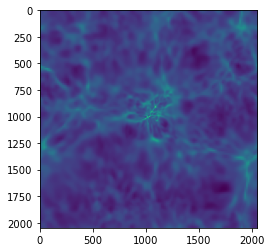

In [44]:
%%time
plt.imshow(np.log10(den_slice))

import napari

In [45]:
import napari 
v = napari.Viewer()

In [48]:
v.add_image(np.log10(ds_zarr.enzo_Density))

<Image layer 'Image' at 0x7f04673a8d00>

In [51]:
%%time
ds_zarr.enzo_Density.isel({'x':100, 'y':range(500,600), 'z':range(300,400)}).compute()

CPU times: user 208 ms, sys: 32.7 ms, total: 241 ms
Wall time: 137 ms


<xarray.DataArray 'enzo_Density' (y: 100, z: 100)>
array([[0.22482992, 0.22482992, 0.22482992, ..., 0.10945802, 0.10945802,
        0.10945802],
       [0.22482992, 0.22482992, 0.22482992, ..., 0.10945802, 0.10945802,
        0.10945802],
       [0.22482992, 0.22482992, 0.22482992, ..., 0.10945802, 0.10945802,
        0.10945802],
       ...,
       [0.10954349, 0.10954349, 0.10954349, ..., 0.16270362, 0.16270362,
        0.16270362],
       [0.10954349, 0.10954349, 0.10954349, ..., 0.16270362, 0.16270362,
        0.16270362],
       [0.10954349, 0.10954349, 0.10954349, ..., 0.16270362, 0.16270362,
        0.16270362]])
Coordinates:
    x        float64 0.04907
  * y        (y) float64 0.2444 0.2449 0.2454 0.2458 ... 0.2917 0.2922 0.2927
  * z        (z) float64 0.1467 0.1472 0.1477 0.1482 ... 0.1941 0.1946 0.1951
Attributes:
    fieldname:  ['enzo', 'Density']
    ngrids:     512